In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_vgsales.csv')

In [3]:
df_cleaned.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### Publishers have successfully published multiple series or titles in the top 100 list

In [4]:
# Group the data by "Publisher" and count unique series or titles
publisher_counts = df_cleaned.groupby('Publisher')['Name'].nunique()

# Identify publishers with multiple series or titles in the top 100 list
publishers_with_multiple_titles = publisher_counts[publisher_counts > 1]

# Display the publishers and the number of titles they have published
print("Publishers with Multiple Series or Titles in the Top 100 List:")
print(publishers_with_multiple_titles)

Publishers with Multiple Series or Titles in the Top 100 List:
Publisher
10TACLE Studios                   3
1C Company                        3
20th Century Fox Video Games      5
3DO                              30
505 Games                       149
                               ... 
Zoo Games                        29
Zushi Games                      14
bitComposer Games                 3
dramatic create                   5
imageepoch Inc.                   2
Name: Name, Length: 366, dtype: int64


##### Identify any patterns in the success of publishers, such as a focus on specific genres or platforms

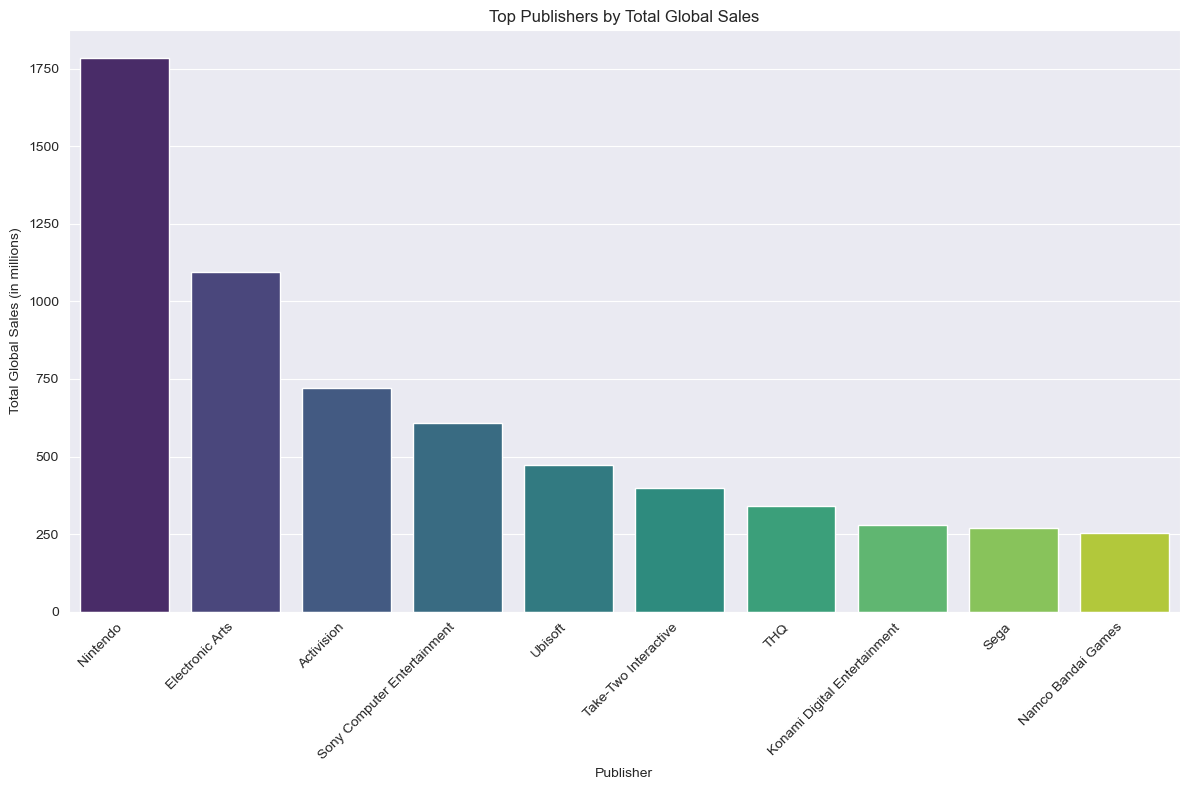

In [5]:
# Group the data by "Publisher"
publisher_group = df_cleaned.groupby('Publisher')

# Calculate aggregate statistics for each publisher
publisher_stats = publisher_group.agg({
    'Global_Sales': 'sum',
    'Genre': lambda x: x.mode().iloc[0],  # Most popular genre
    'Platform': lambda x: x.mode().iloc[0]  # Most popular platform
})

# Sort publishers by total global sales in descending order
publisher_stats = publisher_stats.sort_values(by='Global_Sales', ascending=False)

# Plot the top publishers with their most popular genre and platform
plt.figure(figsize=(12, 8))
sns.barplot(x=publisher_stats.index[:10], y='Global_Sales', data=publisher_stats[:10], palette='viridis')
plt.title('Top Publishers by Total Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()